In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [13]:
data = pd.read_csv(r"E:\Projects Datas\DL\Churn_Modelling.csv")

In [14]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [16]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
from ydata_profiling import ProfileReport
Report=ProfileReport(data)
Report.to_file(output_file='Report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

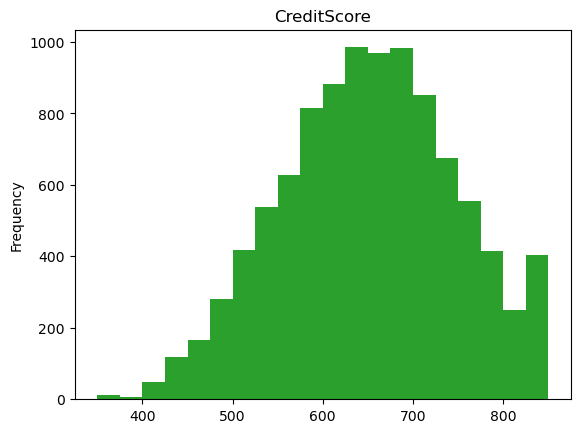

In [17]:
data['CreditScore'].plot(kind='hist', bins=20, title='CreditScore')
plt.show()

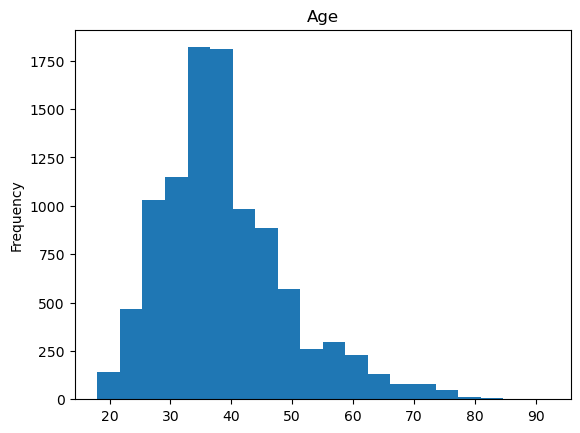

In [18]:
data['Age'].plot(kind='hist', bins=20, title='Age')
plt.show()

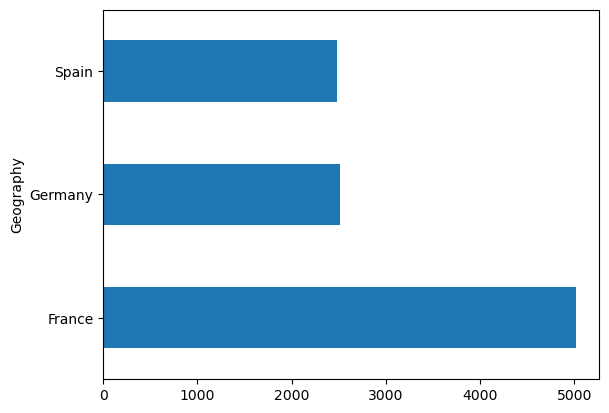

In [19]:
data.groupby('Geography').size().plot(kind='barh')
plt.show()

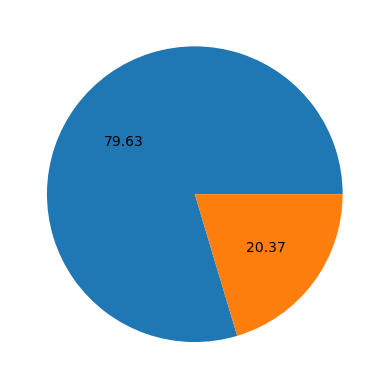

Exited
0    7963
1    2037
Name: count, dtype: int64


In [20]:
plt.pie(data.Exited.value_counts(),autopct='%.2f')
plt.show()
print(data.Exited.value_counts())

In [21]:
X = data.iloc[:,3:13]
y = data.iloc[:,13]

we dont want RowNumber	CustomerId	Surname these columns

In [22]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [23]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [24]:
X.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

### Ferature Engineering

In [26]:
Geography = pd.get_dummies(X.Geography,drop_first=True)
Gender = pd.get_dummies(X.Gender,drop_first=True)

In [27]:
Geography.head()

,Germany,Spain
0,False,False
1,False,True
2,False,False
3,False,False
4,False,True


In [28]:
Gender.head()

,Male
0,False
1,False
2,False
3,False
4,False


In [29]:
X.drop(['Geography','Gender'],axis=1,inplace=True)

In [30]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [31]:
X = pd.concat([X,Geography,Gender],axis=1)

### Training

In [32]:
#Train Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=0)

In [33]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((8000, 11), (2000, 11), (8000,), (2000,))

In [34]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [35]:
x_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [36]:
x_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [37]:
x_train.shape,x_test.shape

((8000, 11), (2000, 11))

### ANN

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [40]:
#initialize the ANN
classifier = Sequential()

In [41]:
## Adding the input Layer
classifier.add(Dense(units=11,activation='relu'))
#Dense adding no of inputs
#relu will applayed to next layer

In [42]:
## adding the first hidden layer
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dropout(.3))
# we can use dropout for every layer
#using dense adding 7 hl
#for next layer using relu activation function

In [43]:
## adding 2nd hidden layer
classifier.add(Dense(units=6,activation='relu'))
classifier.add(Dropout(.2))

In [44]:
## adding output layer
classifier.add(Dense(1,activation='sigmoid'))
# output layer is binary classification
# so used sigmaoid activation function

In [45]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [46]:
# import tensorflow
# tensorflow.keras.optimizers.Adam(learning_rate=0.01)
## for changeing learing rate

In [47]:
## Early Stoping
##if out model not increasing in each Epoch out model will automatically stop
## keras documentation early stoping
## play with values
import tensorflow as tf
early_stoping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [48]:
model_history = classifier.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stoping)

Epoch 1/1000


536/536 [==============================] - 5s 4ms/step - loss: 0.5707 - accuracy: 0.7332 - val_loss: 0.4736 - val_accuracy: 0.7963
Epoch 2/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4748 - accuracy: 0.8007 - val_loss: 0.4461 - val_accuracy: 0.8020
Epoch 3/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4541 - accuracy: 0.8059 - val_loss: 0.4305 - val_accuracy: 0.8073
Epoch 4/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4404 - accuracy: 0.8106 - val_loss: 0.4129 - val_accuracy: 0.8092
Epoch 5/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4178 - accuracy: 0.8171 - val_loss: 0.3971 - val_accuracy: 0.8175
Epoch 6/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4123 - accuracy: 0.8224 - val_loss: 0.3872 - val_accuracy: 0.8360
Epoch 7/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3984 - accuracy: 0.8280 - val_loss: 0.3829 - val_accurac

In [49]:
# validation_spllit =  33% of your data will be used as the validation set, while the remaining 67% will be used for training.
# callbackes = for using early stopping

In [50]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

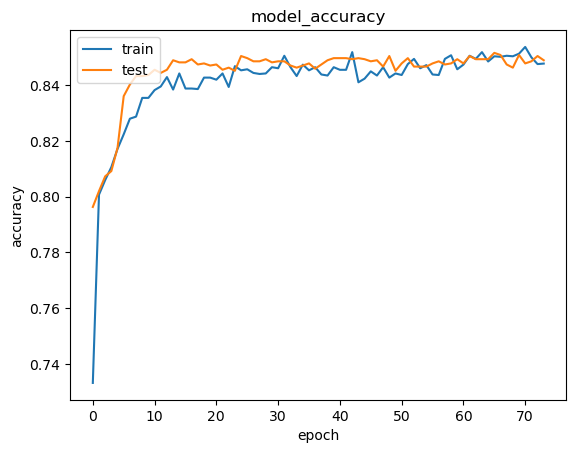

In [51]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

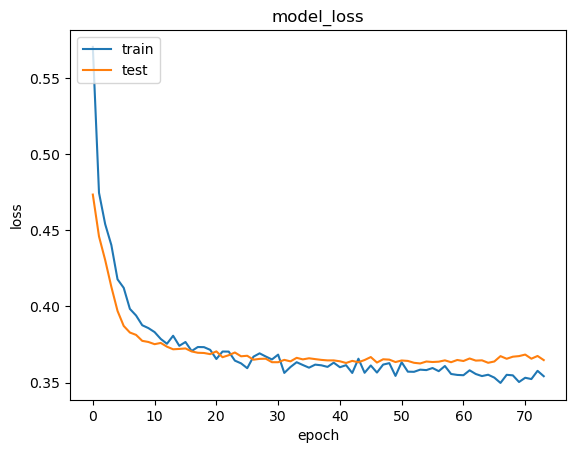

In [52]:
# summarize history for accuracy
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [53]:
#Making Predictions and Evaluating

# predicting the Test set results
y_pred = classifier.predict(x_test)
y_pred = (y_pred>=0.5)

63/63 [==============================] - 0s 3ms/step


In [54]:
## make the confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm = confusion_matrix(y_test,y_pred)
cm

array([[1547,   48],
       [ 233,  172]], dtype=int64)

In [55]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1595
           1       0.78      0.42      0.55       405

    accuracy                           0.86      2000
   macro avg       0.83      0.70      0.73      2000
weighted avg       0.85      0.86      0.84      2000



In [56]:
accuracy_score(y_test,y_pred)

0.8595

In [57]:
## get the weights
classifier.get_weights()

[array([[-3.57722998e-01, -6.41009286e-02,  1.90761127e-02,
         -3.62490445e-01,  5.46709485e-02, -1.77581027e-01,
         -3.15265864e-01,  2.30113074e-01, -2.60818470e-02,
          2.37725955e-02, -5.55217341e-02],
        [ 4.54759002e-01, -5.83317995e-01,  1.90186258e-02,
          5.86079001e-01,  2.34210249e-02,  7.27203786e-01,
         -1.41491547e-01,  3.76184881e-01,  6.10928982e-02,
         -1.00900245e+00, -6.16726935e-01],
        [-1.57240838e-01, -2.61902213e-02, -1.15102082e-01,
         -1.49804726e-01, -7.06245983e-03,  1.05955988e-01,
          1.26310900e-01,  1.04420513e-01,  1.29667416e-01,
         -2.00180694e-01,  1.48737520e-01],
        [-3.54627818e-01, -2.38209516e-01, -6.40904546e-01,
          1.91846490e-02,  3.12791616e-01,  1.82685722e-02,
          3.27374935e-01, -2.58221507e-01, -9.21647027e-02,
         -2.99897879e-01,  2.43494548e-02],
        [-8.15384910e-02,  5.25910743e-02, -9.07837868e-01,
          6.14271939e-01,  1.19987714e+00, -

In [58]:
import pickle

In [59]:
filename = 'churnmodel.sav'
pickle.dump(classifier,open(filename,'wb'))